In [240]:
import pandas as pd
import numpy as np
df = pd.read_csv('Salary_Data.csv')

In [241]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


# Descriptive statistics

### Let's display some statistics, which includes mean, median and standard deviation about numerical fields

#### Firstly, lets analyse the Salary column

In [242]:
print('Mean:', df['Salary'].mean(), '\nMedian:', df['Salary'].median(), '\nStd:', df['Salary'].std())

Mean: 115326.96477086132 
Median: 115000.0 
Std: 52786.18391068297


#### Now lets do the same with Age and Years of Experience

#### Age

In [243]:
print('Mean:', df['Age'].mean(), '\nMedian:', df['Age'].median(), '\nStd:', df['Age'].std())

Mean: 33.62085944494181 
Median: 32.0 
Std: 7.614632626251303


#### Years of Experience

In [244]:
print('Mean:', df['Years of Experience'].mean(), '\nMedian:', df['Years of Experience'].median(), '\nStd:', df['Years of Experience'].std())

Mean: 8.094687360095508 
Median: 7.0 
Std: 6.059003056634102


# Data cleanup

### Now lets check if my dataset has any NaNs

In [245]:
df.isnull().sum().sum()

17

#### As we can see, my dataset has some NaNs

#### And I want to delete them 

In [246]:
df = df.dropna()

#### Now lets check if my dataset is clean 

In [247]:
df.isnull().sum().sum()

0

### We can notice that my data set doesn't have any NaNs now

In [248]:
df.Gender.value_counts()

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

#### I have also noticed that in Gender column there is the name 'Other' and I want to delete it from my dataset now 

In [249]:
lst = []
lst = df[df.Gender=='Other'].index[0:14]
df = df.drop(labels=lst, axis=0)

In [250]:
df.Gender.value_counts()

Male      3671
Female    3013
Name: Gender, dtype: int64

#### As we can see there ar e only Males ond Females now 

##### Moreover, there are some inaccuracies in Educational level names, like 'Bachelor's' and 'Bachelor's Degree', 'Master's' and 'Master's Degree', 'phD' and 'PhD'

In [251]:
df["Education Level"].value_counts()

Bachelor's Degree    2265
Master's Degree      1570
PhD                  1368
Bachelor's            756
High School           436
Master's              288
phD                     1
Name: Education Level, dtype: int64

##### Now I want to correct it 

In [252]:
df['Education Level'] = df['Education Level'].replace("Bachelor's", "Bachelor's Degree")
df['Education Level'] = df['Education Level'].replace("Master's", "Master's Degree")
df['Education Level'] = df['Education Level'].replace("phD", "PhD")

In [253]:
df["Education Level"].value_counts()

Bachelor's Degree    3021
Master's Degree      1858
PhD                  1369
High School           436
Name: Education Level, dtype: int64

####  Finally, all is OK now!

In [254]:
df["Education Level"].value_counts()

Bachelor's Degree    3021
Master's Degree      1858
PhD                  1369
High School           436
Name: Education Level, dtype: int64

# Simple Plots

In [255]:
import seaborn as sns
import seaborn.objects as so
import plotly.express as px
import plotly.graph_objects as go

### Firstly, I want to see what education level does the majority of employees have 

In [256]:
val = []
df["Education Level"].value_counts()
for i in range(4):
    val.append(df["Education Level"].value_counts()[i])

    
fig = go.Figure(data=[go.Pie(labels=df["Education Level"].value_counts().index.tolist(), values=val, hole=.3)])
fig.show()

### It is noticible that most of employees have Bachelor's degree

### Next, I want to see how salary column correlates with the age of employees

In [258]:
fig = px.scatter(df[['Age', 'Salary']].groupby('Age', as_index=False).mean(),
                 x="Age", y="Salary",  marginal_y="rug")
fig.show()

### The key feature of this graph is that people under 30 on average do not earn more than 80k

### Now I want denote how education level influences salary 

In [259]:
ed_df = df[['Salary', 'Education Level']].groupby('Education Level', as_index=False).mean().sort_values("Education Level")
fig = px.bar(ed_df, x="Education Level", y="Salary", color = 'Education Level')
fig.show()

### As we can see, the higher the level of education, the higher the salary is 

# Detailed overview

### This graph shows the correlation of age and salary for men and women 

<AxesSubplot:xlabel='Age', ylabel='Salary'>

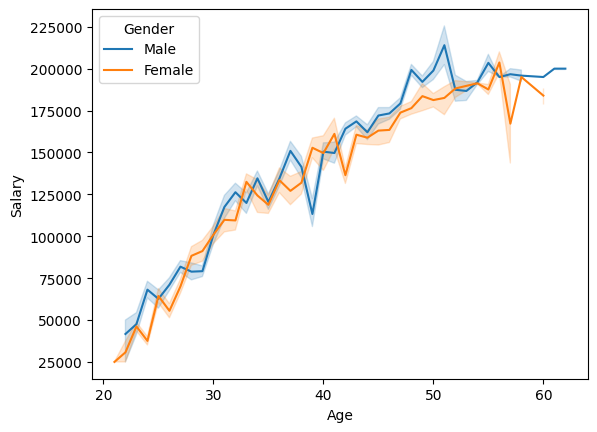

In [260]:
sns.lineplot(df,x="Age",y="Salary",hue="Gender")

### Now I want to show how salary correlates with age, education level and work experience

In [261]:
vsd = df[["Age", "Salary", "Years of Experience", "Education Level"]].groupby(["Education Level","Years of Experience"],as_index=False).mean()

In [262]:
px.scatter(vsd, 
           x="Age", y="Salary",
                size="Years of Experience", color="Education Level",
                  size_max=20,trendline="lowess",hover_data=["Years of Experience"])

# Hypothesis

### I have found information on the Internet that the average salary of women in Russia is less than men's one by around 30% and the salry on the similar positions is less than approximately 10%.

### Now I want check if statistics are the same in my dataset.

#### Firstly, lets find the average sale for women

In [263]:
av_w = df.loc[df['Gender'] == 'Female', 'Salary'].mean().round()
av_w

107889.0

#### And for men

In [264]:
av_m = df.loc[df['Gender'] == 'Male', 'Salary'].mean().round()
av_m

121396.0

In [265]:
prs = (av_m /av_w - 1) * 100
prs

12.519348589754276

### It would also be interesting to see how the age of men and women correlates with their salary and to compare it one more time 

In [266]:
fig = px.line(df[['Salary', 'Gender','Age']].groupby(['Gender', 'Age'], as_index=False).mean(), x="Age", y="Salary", color='Gender')
fig.show()

### By information from my dataset, women's salary is less than men's one by around 12%. This means that the first part of my hypothesis was wrong

### Now lets check the second part of it

In [267]:
df['Job Title'].value_counts()

Software Engineer               518
Data Scientist                  453
Software Engineer Manager       376
Data Analyst                    363
Senior Project Engineer         316
                               ... 
Technical Support Specialist      1
Senior HR Specialist              1
Accountant                        1
Director of Human Capital         1
UX Designer                       1
Name: Job Title, Length: 191, dtype: int64

### As there are a lot of jobs I will check my hyphothesis only for five most common job titles 

In [268]:
job_title = ['Software Engineer', 'Data Scientist', 'Software Engineer Manager', 'Data Analyst', 'Senior Project Engineer']
sort_df = df.loc[df['Job Title'].isin(job_title)]
sort_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
32,29.0,Male,Master's Degree,Data Scientist,3.0,75000.0
81,41.0,Female,Master's Degree,Data Analyst,13.0,80000.0
375,31.0,Male,Master's Degree,Data Scientist,6.0,160000.0
...,...,...,...,...,...,...
6230,32.0,Female,PhD,Data Scientist,9.0,145000.0
6233,27.0,Male,Bachelor's Degree,Software Engineer,3.0,80000.0
6244,32.0,Female,PhD,Data Scientist,9.0,145000.0
6247,27.0,Male,Bachelor's Degree,Software Engineer,3.0,80000.0


In [269]:
sort_df1 = sort_df[['Salary', 'Gender', 'Job Title']].groupby(['Gender', 'Job Title'], as_index=False).mean().round().sort_values("Job Title")
sort_df1

,Gender,Job Title,Salary
0,Female,Data Analyst,114961.0
5,Male,Data Analyst,130675.0
1,Female,Data Scientist,163203.0
6,Male,Data Scientist,168442.0
2,Female,Senior Project Engineer,150939.0
7,Male,Senior Project Engineer,173618.0
3,Female,Software Engineer,104668.0
8,Male,Software Engineer,118335.0
4,Female,Software Engineer Manager,171793.0
9,Male,Software Engineer Manager,172759.0


In [270]:
ar = sort_df1[sort_df1.Gender == "Male"].Salary.values / sort_df1[sort_df1.Gender == "Female"].Salary.values

In [271]:
jb = [' Data Analyst', 'Data Scientist', 'Senior Project Engineer', 'Software Engineer', 'Software Engineer Manager']
j = -1
for i in ar:
    j += 1
    print(((i-1)*100).round(), '-', jb[j])

14.0 -  Data Analyst
3.0 - Data Scientist
15.0 - Senior Project Engineer
13.0 - Software Engineer
1.0 - Software Engineer Manager


### As we can see, for Data Analyst difference is 14%, for Data Scientist 3%, for Senior Project Engineer 15%, Software Engineer - 13%, Software Engineer Manager - 1%, so my hypothesis isn’t entirely true

In [272]:
fig = px.bar(sort_df1,
              x="Job Title", y="Salary", color="Gender",barmode='group')
fig.show()

# Data Transformation

### During my work I have noticed that some employees earn less that than the average salary for their job and I want to check it

### I want to add a new column to my dataset where it will be visible by how much the salary of certain employees is below the average salary for their profession

In [273]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [274]:
df1 = df[['Salary', 'Job Title']].groupby('Job Title', as_index=False).mean().round().sort_values("Job Title")
df1.index = df1["Job Title"]

In [275]:
for job in df1.index:
    _temp = df[df["Job Title"] == job]
    ave = df1.loc[job,"Salary"]
    df.loc[_temp.index, "Deviation From The Average Falary For This Job"] = np.where(_temp.Salary.values >= ave, 0, ave - _temp.Salary.values)


In [276]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Deviation From The Average Falary For This Job
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,23243.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,60091.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,10000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,0.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0,0.0
...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,0.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,88060.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,0.0


In [277]:
len(df[df['Deviation From The Average Falary For This Job'] != 0])

3303

### As we can see, almost a half of employees from my dataset actually earn less 

### It would be interesting to see what the possible causes of lower salary are, and I would like to add another column where they will be identified according to the statistics presented earlier 

#### There were no statistics about correlation of salary with years of experience, so I will add it now 

In [278]:
fig = px.line(df[['Salary', 'Years of Experience']].groupby('Years of Experience', as_index=False).mean(), x="Years of Experience", y="Salary")
fig.show()

#### It is clear that people start to earn higher salary (more than 100k) after 5 years of working  

### Now lets add a new column

In [279]:
def prediction(row):
    age = row['Age'] < 30
    exp = row['Years of Experience'] <= 5
    ed = row['Education Level'] == 'High School'
    sex = row['Gender'] == 'Female'
    if row['Deviation From The Average Falary For This Job'] != 0:
        if age * exp * ed * sex == 1:
            return 'Age & Experience & Education & Gender'
        else:
            if age * exp * ed == 1:
                return 'Age & Experience & Education'
            elif age * exp * sex == 1:
                return 'Age & Experience & Gender'
            elif age * ed * sex == 1:
                return 'Age & Education & Gender'
            elif exp * ed * sex == 1:
                return 'Experience & Education & Gender'
            else:
                if age * exp == 1:
                    return 'Age & Experience'
                elif age * ed == 1:
                    return 'Age & Education'
                elif age * sex == 1:
                    return 'Age & Gender'
                elif exp * ed == 1:
                    return 'Experience & Education'
                elif exp * sex == 1:
                    return 'Experience & Gender'
                elif ed * sex == 1:
                    return 'Education & Gender'
                else:
                    if age == 1:
                        return 'Age'
                    elif exp == 1:
                        return 'Experience'
                    elif ed == 1:
                        return 'Education'
                    elif sex == 1:
                        return 'Gender'
                    else:
                        return 'Other'

    else:
        return ' '
df['A Possible Reason For A Lower Salary'] = df.apply(prediction, axis=1)


In [280]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Deviation From The Average Falary For This Job,A Possible Reason For A Lower Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,23243.0,Experience
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,60091.0,Age & Experience & Gender
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,10000.0,Other
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,0.0,
4,52.0,Male,Master's Degree,Director,20.0,200000.0,0.0,
...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,0.0,
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0.0,
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,88060.0,Experience & Gender
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,0.0,
